In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
#컨볼루션 오토인코더를 활용하여 Denoising
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 

In [3]:
#가우스 노이즈 데이터 생성
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0, 1)
x_test_noisy = np.clip(x_test_noisy, 0, 1)

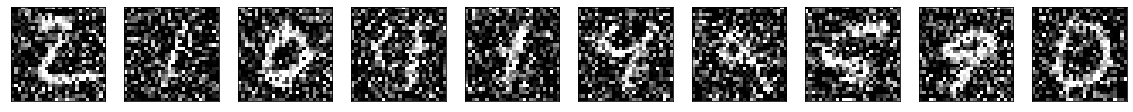

In [4]:
#노이즈 데이터 시각화
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [5]:
#컨볼루션 오토인코더를 활용
#Deep autoencoder를 활용해도 된다.(이 경우 인풋을 784로 맞춰야 한다.) 

from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=1024,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/50
59/59 [==============================] - 34s 86ms/step - loss: 0.3369 - val_loss: 0.2009
Epoch 2/50
59/59 [==============================] - 4s 73ms/step - loss: 0.1682 - val_loss: 0.1467
Epoch 3/50
59/59 [==============================] - 4s 73ms/step - loss: 0.1386 - val_loss: 0.1308
Epoch 4/50
59/59 [==============================] - 4s 73ms/step - loss: 0.1285 - val_loss: 0.1242
Epoch 5/50
59/59 [==============================] - 4s 73ms/step - loss: 0.1237 - val_loss: 0.1208
Epoch 6/50
59/59 [==============================] - 4s 73ms/step - loss: 0.1207 - val_loss: 0.1182
Epoch 7/50
59/59 [==============================] - 4s 73ms/step - loss: 0.1184 - val_loss: 0.1172
Epoch 8/50
59/59 [==============================] - 4s 74ms/step - loss: 0.1164 - val_loss: 0.1141
Epoch 9/50
59/59 [==============================] - 4s 73ms/step - loss: 0.1149 - val_loss: 0.1127
Epoch 10/50
59/59 [==============================] - 4s 74ms/step - loss: 0.1131 - val_loss: 0.1116
Epoch 11

In [7]:
decoded_imgs = autoencoder.predict(x_test_noisy)

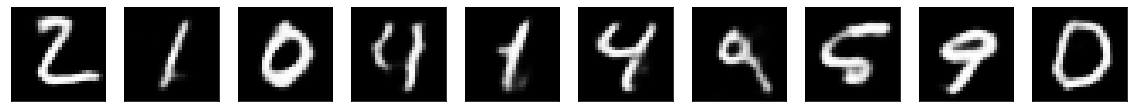

In [8]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()